In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv('data_1.csv')
df.shape

(124106, 11)

In [20]:
df.columns

Index(['experiment', 'time', 'speed', 'gamma', 'signal1', 'signal2', 'signal3',
       'distance_to_goal', 'action', 'orientation', 'reward'],
      dtype='object')

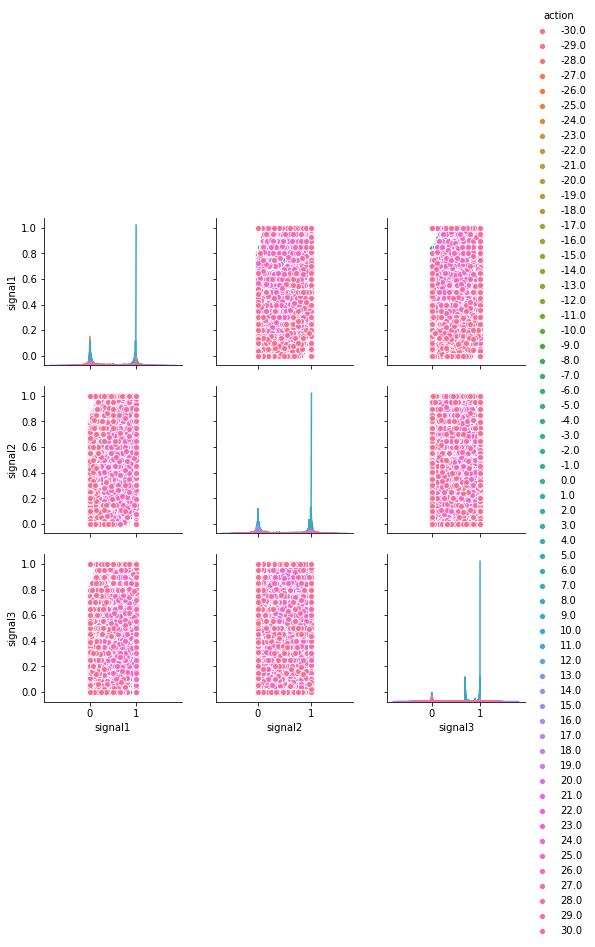

In [21]:
g = sns.pairplot(df, vars=['signal1', 'signal2', 'signal3'], hue='action')

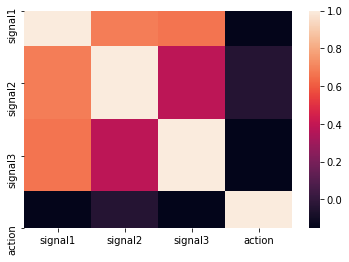

In [12]:
corr = df[['signal1', 'signal2', 'signal3','action']].corr()
sns.heatmap(corr)